# Stack

## Build via Axes

A histogram stack holds multiple 1D histograms into a stack, whose axes are required to match.

In [1]:
from hist import Hist, Stack, axis, NamedHist, BaseHist
import numpy as np
import matplotlib.pyplot as plt

ax = axis.Regular(50, -5, 5, underflow=False, overflow=False, name="X")

h1 = Hist(ax).fill(2 * np.random.normal(size=500) + 2 * np.ones((500,)))

h2 = Hist(ax).fill(2 * np.random.normal(size=500) - 2 * np.ones((500,)))

h3 = Hist(ax).fill(np.random.normal(size=600))

s = Stack(h1, h2, h3)

HistStack has `.plot()` method which calls mplhep and plots the histograms in the stack:

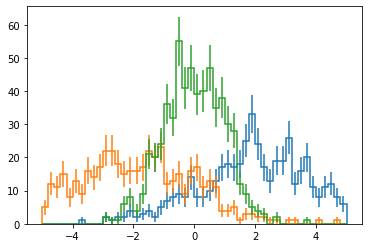

In [2]:
s.plot()
plt.show()

## Build via A Category Axis

You can also build a histogram stack from a 2D histogram's Category axis (`IntCat`, `StrCat`), for example,

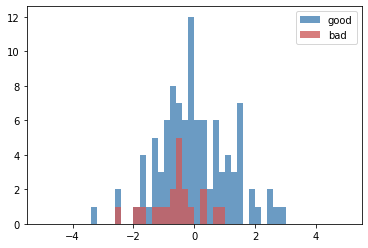

In [6]:
h = (
    Hist.new.Reg(50, -5, 5, name="x")
    .StrCat(["good", "bad"], name="quality")
    .Double()
    .fill(x=np.random.randn(100), quality=["good", "good", "good", "good", "bad"] * 20)
)

# Turn an existin axis into a stack
s = h.stack("quality")
s[::-1].plot(stack=True, histtype="fill", color=["indianred", "steelblue"], alpha=0.8)
plt.legend()
plt.show()

The histograms in this kind of stack can have names. The names of histograms are the categories, which are corresponding profiled histograms:

In [7]:
print(s[0].name)
s[0]

good


Hist(Regular(50, -5, 5, name='x', label='x'), storage=Double()) # Sum: 80.0

In [9]:
print(s[1].name)
s[1]

bad


Hist(Regular(50, -5, 5, name='x', label='x'), storage=Double()) # Sum: 20.0